In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt

In [2]:
path = '/Users/marlis/Developer/SLI/Julie-tutorials/data/ssh_grids_v2205_1992101012.nc'
ds = xr.open_dataset(path)
ds

<xarray.Dataset>
Dimensions:      (Longitude: 2160, nv: 2, Latitude: 960, Time: 1)
Coordinates:
  * Longitude    (Longitude) float32 0.08333 0.25 0.4167 ... 359.6 359.8 359.9
  * Latitude     (Latitude) float32 -79.92 -79.75 -79.58 ... 79.58 79.75 79.92
  * Time         (Time) datetime64[ns] 1992-10-10T12:00:00
Dimensions without coordinates: nv
Data variables:
    Lon_bounds   (Longitude, nv) float32 ...
    Lat_bounds   (Latitude, nv) float32 ...
    Time_bounds  (Time, nv) datetime64[ns] ...
    SLA          (Time, Latitude, Longitude) float32 ...
    SLA_ERR      (Time, Latitude, Longitude) float32 ...
Attributes: (12/21)
    Conventions:            CF-1.6
    ncei_template_version:  NCEI_NetCDF_Grid_Template_v2.0
    Institution:            Jet Propulsion Laboratory
    geospatial_lat_min:     -79.916664
    geospatial_lat_max:     79.916664
    geospatial_lon_min:     0.083333336
    ...                     ...
    version_number:         2205
    Data_Pnts_Each_Sat:     {"16": 661578, "1001": 636257}
    source_version:         commit dc95db885c920084614a41849ce5a7d417198ef3
    SLA_Global_MEAN:        -0.0015108844021796562
    SLA_Global_STD:         0.09098986023297456
    latency:                final

In [9]:
ds['SLA']

<xarray.DataArray 'SLA' (Time: 1, Latitude: 960, Longitude: 2160)>
array([[[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [0.008693, 0.009346, ..., 0.006481, 0.007064],
        [0.009948, 0.010608, ..., 0.007735, 0.008328]]], dtype=float32)
Coordinates:
  * Longitude  (Longitude) float32 0.08333 0.25 0.4167 ... 359.6 359.8 359.9
  * Latitude   (Latitude) float32 -79.92 -79.75 -79.58 ... 79.58 79.75 79.92
  * Time       (Time) datetime64[ns] 1992-10-10T12:00:00
Attributes:
    units:          m
    long_name:      Sea Level Anomaly Estimate
    standard_name:  sea_surface_height_above_sea_level
    alias:          sea_surface_height_above_sea_level

In [18]:
# ds['SLA'].sel(Time='1992-10-10T12:00:00')
ds['SLA'].sel(Latitude=slice(-79.92,0))


<xarray.DataArray 'SLA' (Time: 1, Latitude: 480, Longitude: 2160)>
array([[[          nan,           nan, ...,           nan,           nan],
        [          nan,           nan, ...,           nan,           nan],
        ...,
        [ 2.130628e-03,  4.921757e-03, ..., -1.619544e-03,  3.660413e-04],
        [-2.378487e-03, -2.344073e-05, ..., -3.985931e-03, -3.080392e-03]]],
      dtype=float32)
Coordinates:
  * Longitude  (Longitude) float32 0.08333 0.25 0.4167 ... 359.6 359.8 359.9
  * Latitude   (Latitude) float32 -79.92 -79.75 -79.58 ... -0.25 -0.08333
  * Time       (Time) datetime64[ns] 1992-10-10T12:00:00
Attributes:
    units:          m
    long_name:      Sea Level Anomaly Estimate
    standard_name:  sea_surface_height_above_sea_level
    alias:          sea_surface_height_above_sea_level

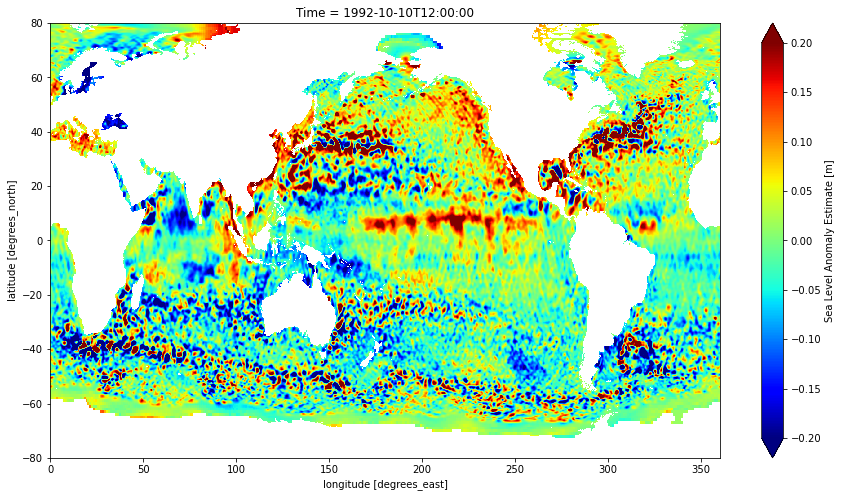

In [25]:
figure = plt.figure(figsize=(15,8))
ds['SLA'].sel(Time='1992-10-10T12:00:00').plot.pcolormesh(vmin=-.2, vmax = .2, 
                      cmap='jet')